# Intensity Graded FFT Plot with RTLSDR

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
#Test RTLSDR capture
from rtlsdr import RtlSdr
sdr = RtlSdr()

# configure device
sdr.sample_rate = 2.048e6  # Hz
sdr.center_freq = 915e6     # Hz
sdr.gain = 'auto'
samples = sdr.read_samples(256*10240)
sdr.close()

In [7]:
#Function
def fft_intensity_plot(samples: np.ndarray, fft_len: int = 256, fft_div: int = 2, mag_steps: int = 100, cmap: str = 'plasma'):
    
    num_ffts = math.floor(len(samples)/fft_len)
    
    fft_array = []
    for i in range(num_ffts):
        temp = np.fft.fftshift(np.fft.fft(samples[i*fft_len:(i+1)*fft_len]))
        temp_mag = 20.0 * np.log10(np.abs(temp))
        fft_array.append(temp_mag)
        
    max_mag = np.amax(fft_array)
    min_mag = np.abs(np.amin(fft_array))
    
    norm_fft_array = fft_array
    for i in range(num_ffts):
        norm_fft_array[i] = (fft_array[i]+(min_mag))/(max_mag+(min_mag)) 
        
    mag_step = 1/mag_steps

    hitmap_array = np.random.random((mag_steps+1,int(fft_len/fft_div)))*np.exp(-10)

    for i in range(num_ffts):
        for m in range(fft_len):
            hit_mag = int(norm_fft_array[i][m]/mag_step)
            hitmap_array[hit_mag][int(m/fft_div)] = hitmap_array[hit_mag][int(m/fft_div)] + 1

    hitmap_array_db = 20.0 * np.log10(hitmap_array+1)
    
    figure, axes = plt.subplots()
    axes.imshow(hitmap_array_db, origin='lower', cmap=cmap, interpolation='bilinear')
    
    return(figure)

# Plots

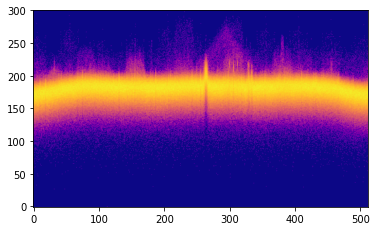

In [8]:
fig1 = fft_intensity_plot(samples, 1024, 2, 300, 'plasma')
fig1.savefig('fig1_intensity.png', dpi=300, format='png')

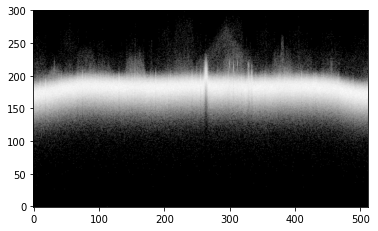

In [15]:
fig4 = fft_intensity_plot(samples, 1024, 2, 300, 'gray')

## Optional Waterfall Plot

In [ ]:
#figure, axes = plt.subplots()
#axes.specgram(samples, NFFT=1024, Fs=2.048e6, noverlap=900, mode='magnitude', cmap='plasma')
#figure.savefig('fig_fall.png', dpi=300, format='png')